Initial Line: (30, 240) to (220, 120)
Initial Region Codes: Point 1 - 9, Point 2 - 2
Intersection Point: (93.33333333333334, 200)
Updated Line: (93.33333333333334, 200) to (220, 120)
Updated Region Codes: Point 1 - 0, Point 2 - 2
Intersection Point: (200, 132.63157894736844)
Updated Line: (93.33333333333334, 200) to (200, 132.63157894736844)
Updated Region Codes: Point 1 - 0, Point 2 - 0
Line completely inside the clipping window.


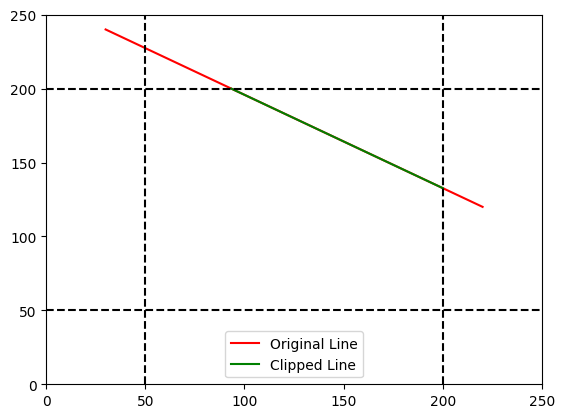

In [1]:
import matplotlib.pyplot as plt

# Define the region codes
INSIDE = 0  # 0000
LEFT = 1    # 0001
RIGHT = 2   # 0010
BOTTOM = 4  # 0100
TOP = 8     # 1000

# Define the clipping window boundaries
x_min = 50
y_min = 50
x_max = 200
y_max = 200

# Function to compute the region code for a point (x, y)
def compute_region_code(x, y):
    code = INSIDE

    if x < x_min:
        code |= LEFT
    elif x > x_max:
        code |= RIGHT

    if y < y_min:
        code |= BOTTOM
    elif y > y_max:
        code |= TOP

    return code

# Function to clip a line using Cohen-Sutherland algorithm
def clip_line(x1, y1, x2, y2):
    # Compute the region codes for the two endpoints
    code1 = compute_region_code(x1, y1)
    code2 = compute_region_code(x2, y2)

    output = f"Initial Line: ({x1}, {y1}) to ({x2}, {y2})"
    output += f"\nInitial Region Codes: Point 1 - {code1}, Point 2 - {code2}\n"

    while True:
        # If both endpoints are inside the clip window, accept the line
        if code1 == 0 and code2 == 0:
            output += "Line completely inside the clipping window."
            return (x1, y1, x2, y2), output

        # If the bitwise AND of both codes is not zero, the line is outside the window
        if code1 & code2 != 0:
            output += "Line completely outside the clipping window."
            return None, output

        # Select an endpoint outside the clip window
        code = code1 if code1 != 0 else code2

        # Find the intersection point
        if code & TOP:
            x = x1 + (x2 - x1) * (y_max - y1) / (y2 - y1)
            y = y_max
        elif code & BOTTOM:
            x = x1 + (x2 - x1) * (y_min - y1) / (y2 - y1)
            y = y_min
        elif code & RIGHT:
            y = y1 + (y2 - y1) * (x_max - x1) / (x2 - x1)
            x = x_max
        elif code & LEFT:
            y = y1 + (y2 - y1) * (x_min - x1) / (x2 - x1)
            x = x_min

        output += f"Intersection Point: ({x}, {y})\n"

        # Update the endpoint outside the clip window with the intersection point
        if code == code1:
            x1, y1 = x, y
            code1 = compute_region_code(x1, y1)
        else:
            x2, y2 = x, y
            code2 = compute_region_code(x2, y2)

        output += f"Updated Line: ({x1}, {y1}) to ({x2}, {y2})"
        output += f"\nUpdated Region Codes: Point 1 - {code1}, Point 2 - {code2}\n"

# Define the line coordinates
x1, y1 = 30, 240
x2, y2 = 220, 120

# Clip the line
result, output = clip_line(x1, y1, x2, y2)

# Print the output
print(output)

# Plotting the original line and the clipped line
plt.plot([x1, x2], [y1, y2], 'r', label='Original Line')
if result is not None:
    x1, y1, x2, y2 = result
    plt.plot([x1, x2], [y1, y2], 'g', label='Clipped Line')
plt.xlim(0, 250)
plt.ylim(0, 250)
plt.axhline(y_min, color='k', linestyle='--')
plt.axhline(y_max, color='k', linestyle='--')
plt.axvline(x_min, color='k', linestyle='--')
plt.axvline(x_max, color='k', linestyle='--')
plt.legend()
plt.show()


# divided into 9 region
# 0 0 0 0 (T, B, R, L)